## 1. Import the appropriate libraries

In [32]:
# import libraries

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import requests
from io import StringIO

# I may not have stargazer; this will test whether I have and install if I haven't

try:
    import stargazer
    print("Stargazer is already installed.")
except ImportError:
    print("Stargazer is not installed. Installing now...")
    !pip install stargazer

from stargazer.stargazer import Stargazer

Stargazer is already installed.


## 2. Load up the data set

In [33]:
# load directly from the Harvard Dataverse

file_url = 'https://dataverse.harvard.edu/api/access/datafile/8162845'

response = requests.get(file_url)
response.raise_for_status()

# I'll call the data frame 'cc'

cc = pd.read_csv(StringIO(response.text), sep='\t')

# now check to see if the data have downloaded
# and been passed to the data frame

if cc.empty: 
    print("Data not loaded.")
else: 
    print("Data successfully loaded.")

Data successfully loaded.


## 3. "Eyeball" the data

In [34]:
print('Number of variables:   ', len(cc.columns))

# show how many rows of data we have

print('Number of rows of data:', len(cc))

# See the variable names 

print('\nVariable names: ') 

list(cc.columns)

Number of variables:    257
Number of rows of data: 3222

Variable names: 


['fips',
 'countyCode',
 'FastFoodRestaurants',
 'Pizza',
 'AmericanRestaurants',
 'MexicanRestaurants',
 'ChineseRestaurants',
 'CoffeeAmpersandEspressoRestaurants',
 'CoffeeShops',
 'BarAmpersandGrills',
 'Delicatessens',
 'ItalianRestaurants',
 'BarbecueRestaurants',
 'SandwichShops',
 'FamilyStyleRestaurants',
 'SeafoodRestaurants',
 'ChickenRestaurants',
 'Taverns',
 'DonutShops',
 'Bakeries',
 'Bars',
 'SushiBars',
 'JapaneseRestaurants',
 'SteakHouses',
 'BrewPubs',
 'TakeOutRestaurants',
 'AsianRestaurants',
 'HamburgersAmpersandHotDogs',
 'ThaiRestaurants',
 'BreakfastCommaBrunchAmpersandLunchRestaurants',
 'LatinAmericanRestaurants',
 'CoffeeAmpersandTea',
 'CocktailLounges',
 'IndianRestaurants',
 'MediterraneanRestaurants',
 'VietnameseRestaurants',
 'Bagels',
 'HealthFoodRestaurants',
 'Juices',
 'SportsBars',
 'BuffetRestaurants',
 'Cafeterias',
 'GreekRestaurants',
 'FrenchRestaurants',
 'KoreanRestaurants',
 'MiddleEasternRestaurants',
 'CaribbeanRestaurants',
 'Yogurt'

In [35]:
# show descriptive statistics of Chinese restaurants 

print(cc['ChineseRestaurants'].describe()) 

count    3222.000000
mean       11.332713
std        29.330972
min         0.000000
25%         1.000000
50%         4.000000
75%        10.000000
max       767.000000
Name: ChineseRestaurants, dtype: float64


In [36]:
# show descriptive statistics of 

print('trump2016Share: ') 
print(cc['trump2016Share'].describe()) 

# make another new var, multiplied by 100

cc['trump2016PC'] = cc['trump2016Share'] * 100

# see the numbers again

print('\n\ntrump2016PC: ') 
print(cc['trump2016PC'].describe())

trump2016Share: 
count    3114.000000
mean        0.632379
std         0.156961
min         0.040875
25%         0.544241
50%         0.663261
75%         0.749001
max         0.960334
Name: trump2016Share, dtype: float64


trump2016PC: 
count    3114.000000
mean       63.237937
std        15.696068
min         4.087474
25%        54.424108
50%        66.326097
75%        74.900062
max        96.033403
Name: trump2016PC, dtype: float64


## 4. Develop a hypothesis
- __H1__: The greater the proportion of Chinese restaurants in a US constituency, relative to all other restaurants or food-outlets, the lower the support for Trump in 2016 . 

## 5. The theoretical basis for that hypothesis, with literature
In the United States, Chinese restaurants are mainly run by Chinese and are mostly located in urban areas with a large number of Chinese. These areas are often on the fringes of cities, where poverty and unemployment are widespread (Zhou & Lin, 2005)(Lee, 2019)(Yeh et al., 2008). Most of the operators of these Chinese restaurants are Chinese immigrants. Although some have become American citizens, they also have close ties with China and are treated as Chinese nationals in society (Zhou, 2022). For President Trump, Sino-U.S. trade has always been his biggest concern. During the campaign, he believed that China was the culprit of unemployment in the U.S. manufacturing industry and worsening trade imbalances (Lin & Wang, 2018), and he conducted political propaganda around these to win for himself(Chinn, 2016). vote. His China threat statements objectively deepened the prejudice and discrimination against Chinese in American society and social divisions(Le et al., 2020), and also affected the attitude of the Chinese community towards him (Samson, 2021).

The theoretical expectation of this hypothesis is that Chinese restaurants in the United States are opened in areas with a large number of Chinese people, and most of the restaurant operators are Chinese. They are American citizens and have the right to vote. Trump’s negative remarks about China have hurt the Chinese in society, so their support rate for Trump is low. Therefore, in areas with more Chinese restaurants, Trump’s support rate in 2016 should be lower.

### Sources cited  
- Zhou, M., & Lin, M. (2005). Community Transformation and the Formation of Ethnic Capital: Immigrant Chinese Communities in the United States. Journal of Chinese Overseas, 1(2), 260–284.
- Lee, R. (2019). Who does the dishes? Precarious employment and ethnic solidarity among restaurant workers in Los Angeles’ Chinese enclave. Ethnicities, 19(2), 433-451.
- Yeh, C. J., Kim, A. B., Pituc, S. T., & Atkins, M. (2008, January). Poverty, loss, and resilience: The story of Chinese immigrant youth. Journal of Counseling Psychology, 55(1), 34–48.
- Zhou, Y. (2022). Food, Ethnic Entrepreneurship and Acculturation: Exploring the trajectory of Chinese immigrants and Chinese restaurant business in North America.
- Lin, J. Y., & Wang, X. (2018). Trump economics and China–US trade imbalances. Journal of Policy Modeling, 40(3), 579-600.
- Chinn, S. (2016). Trump and Chinese Exclusion: Contemporary Parallels with Legislative Debates over the Chinese Exclusion Act of 1882. Tenn. L. Rev., 84, 681.
- Le, D., Arora, M., & Stout, C. (2020). Are you threatening me? Asian‐American panethnicity in the Trump era. Social Science Quarterly, 101(6), 2183-2192.
- Samson, F. L. (2021). The Political Dimensions of Anti-Asian American Sentiment: Evidence from the 2016 and 2020 American National Election Studies Panel. Available at SSRN 3878382.

## 6. Perform a statistical analysis

### Correlation

In [37]:
# print the correlation

print('Correlation between ChineseRestaurants and trump2016PC: ')
print(cc['ChineseRestaurants'].corr(cc['trump2016PC']))

Correlation between ChineseRestaurants and trump2016PC: 
-0.39298669378246043


### Scatterplot


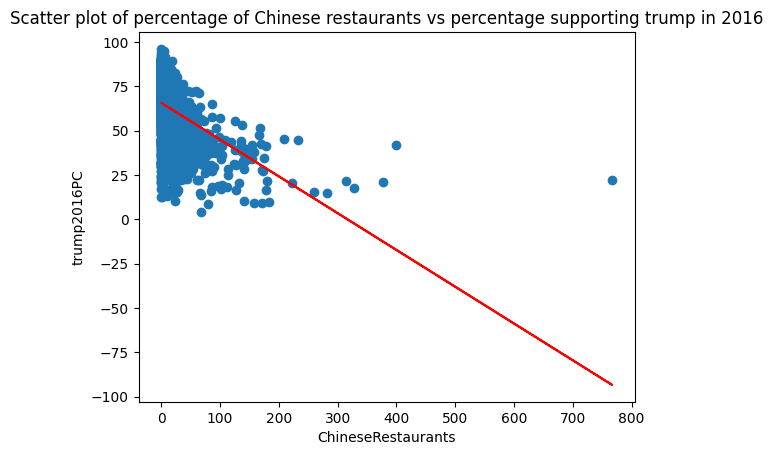

In [38]:
# define our x and y axes

x = cc['ChineseRestaurants']
y = cc['trump2016PC']

# remove any missing values from x and y

mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
x, y = x[mask], y[mask]

# create the scatter plot

plt.scatter(x, y)

# put names on it

plt.title('Scatter plot of percentage of Chinese restaurants vs percentage supporting trump in 2016')
plt.xlabel('ChineseRestaurants')
plt.ylabel('trump2016PC')

# let's get all fancy and do a regression line
# (or line of best fit) 

slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

# add the line to the plot 

plt.plot(x, line, color='red')

# render the scatter plot

plt.show()

### Regression models

In [39]:
# build models

# create the base model

model1 = smf.ols('trump2016PC ~ ChineseRestaurants ', data=cc).fit()

# now a model with controls

model2 = smf.ols('trump2016PC ~ ChineseRestaurants + povertyPercent + incomeInequality + unemploymentRate + urbanRuralStatus', data=cc).fit()

# show the output of the models
print(model1.summary())
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            trump2016PC   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     568.4
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          1.58e-115
Time:                        11:47:57   Log-Likelihood:                -12731.
No. Observations:                3114   AIC:                         2.547e+04
Df Residuals:                    3112   BIC:                         2.548e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             65.6680      0

### Simplify this

In [40]:
star1 = Stargazer([model1])

star1

In [41]:
# and here's the second model in a second block
# because stargazer is riddled with errors.

star2 = Stargazer([model2])

star2

## 7. Determine whether in favour of the hypothesis, or against the hypothesis. 

In this case, I find __in favour of the hypothesis__. Here's why: 

 - There is a negative correlation (-0.39) between Chinese restaurants and trump share in 2016.
 - There is a strong, negative relationship (p < 0.01) between Chinese restaurants and 2016 trump share. In a bivariate regression model, over 15 percent of the trump variance (R^2 = 0.154) is explained by Chinese restaurants alone. 
 - In the base model, every time we increase one Chinese restaurant, we decrease the trump 2016 share by 0.207 percent.
- When we introduce other key control variables which have been identified in the literature as key determinants of Trump share in 2016, Chinese restaurants remain strongly significant. 

## 8. Answer the **interpretation question**

- The R-squared value indicates the proportion of variance in the dependent variable that is explained by the independent variables in the model. A higher R-squared value (closer to 1) suggests that the independent variables in the model are better at explaining the variation in the dependent variable. On the contrary, a lower R-squared value suggests that the model may not fit the data well. 
- Coefficients represent the estimated effects of the independent variables on the dependent variable. Larger coefficients suggest a stronger influence of the independent variable on the dependent variable. The sign of the coefficient indicates whether there is a positive or negative correlation between variables, with a positive sign indicating a positive correlation and a negative sign indicating a negative correlation.
- Standard errors measure the precision of the coefficient estimates. Smaller standard errors indicate greater precision, meaning that the coefficient estimate is likely to be closer to the true population value.